In [35]:
import os
import re
import string


import pandas as pd
import matplotlib.pyplot as plt
import pymorphy2
import numpy as np


from task1 import create_csv1
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words("russian")


In [5]:
def create_columns(name_class_good: str, name_class_bad: str, df: pd.DataFrame) -> None:
    '''create columns of DataFrame'''
    df['review'] = ""
    df['number_words'] = ""
    i = 0
    for file_dataset in os.listdir("dataset"):
        path_p = os.path.join("dataset", file_dataset)
        class_name = os.listdir(path_p)
        for elem in class_name:
            name = os.path.join(path_p, elem)
            f = open(name, mode='rt', encoding='utf-8')
            data = f.read()
            df.loc[[i], 'review'] = data
            words = data.split()
            df.loc[[i], 'number_words'] = len(words)
            f.close()
            i += 1


def create_new_df(df: pd.DataFrame, limit: int) -> pd.DataFrame:
    '''create new DataFrame with limiting value'''
    return df[df['number_words'] <= limit][['class_name', 'review', 'number_words']]


def create_df_label(df: pd.DataFrame, label: str) -> pd.DataFrame:
    '''create new DataFrame by label'''
    return df[df['class_name'] == label][['class_name', 'review', 'number_words']]


def group_df(df: pd.DataFrame) -> pd.DataFrame:
    '''grouping the data frame by label and displaying the average value, maximum and minimum of the "number_words" '''
    print("average: ", df.number_words.mean(axis=0))
    print("maximum: ", df.number_words.max())
    print("minimum", df.number_words.min())
    return df.groupby('class_name').count()


def lemmatize(text) -> list:
    '''lemmatization of the text'''
    new_list = []
    tt = str.maketrans(dict.fromkeys(string.punctuation))
    elem = text.translate(tt)
    if elem is not None:
        list_words = elem.split()
    for word in list_words:
        p = morph.parse(word)[0]
        new_list.append(p.normal_form)
    return new_list


def create_histog(df: pd.DataFrame, label: str) -> plt.Figure:
    '''create histogram'''
    dict = {}
    tmp_list = []
    df = df[df['class_name'] == label][['review']]
    for text in df['review']:
        list_new = lemmatize(text)
    for word in list_new:
        if word not in dict.keys():
            dict[word] = list_new.count(word)
            tmp_list.append(list_new.count(word))
    return tmp_list, dict


create DataFrame

In [7]:
name_class_good = "good"
name_class_bad = "bad"
create_csv1(name_class_bad, name_class_good, "annotation")
df = pd.read_csv("annotation", encoding='utf-16', delimiter=';',
                 names=['absolut_path', 'otnos_path', 'class_name'])
df = df.drop(['absolut_path', 'otnos_path'], axis=1)
df


,class_name
0,good
1,good
2,good
3,good
4,good
...,...
1995,bad
1996,bad
1997,bad
1998,bad


checking for emptiness

In [9]:
pd.isnull(df)


,class_name
0,False
1,False
2,False
3,False
4,False
...,...
1995,False
1996,False
1997,False
1998,False


counting number of empty elements

In [10]:
df.isnull().sum()


class_name    0
dtype: int64

In [8]:
create_columns(name_class_good, name_class_bad, df)
df


,class_name,review,number_words
0,good,"Сумерки\nНа фильм попала случайно, никогда осо...",238
1,good,Сумерки\nСкажу сразу: смотрела фильм скаченный...,194
2,good,Сумерки\nК своему счастью с книгой я познакоми...,753
3,good,"Сумерки\nПризнаюсь, фильм решила посмотреть из...",281
4,good,Сумерки\nФильм 'Сумерки' реально мёртвое кино ...,332
...,...,...,...
1995,bad,"Тайна Коко\nНаверное, это будет мой самый коро...",392
1996,bad,"Тайна Коко\nБез сомнения, у студии Пиксар есть...",822
1997,bad,Тайна Коко\n'Тайна Коко' - это история о мекси...,272
1998,bad,"Тайна Коко\nК сожалению, в последнее время, та...",218


In [12]:
df_lim = create_new_df(df, 100)
df_lim


,class_name,review,number_words
1958,bad,Список Шиндлера\nНасколько реально снять фильм...,82
1983,bad,Список Шиндлера\nЯ редко помню о чем было прос...,86
1984,bad,10 причин моей ненависти\nЭто хоть и стареньки...,35


statistical information for number_words column

In [13]:
df.number_words.describe()


count     2000
unique     132
top        281
freq        92
Name: number_words, dtype: int64

In [14]:
df_met = create_df_label(df, name_class_good)
df_met


,class_name,review,number_words
0,good,"Сумерки\nНа фильм попала случайно, никогда осо...",238
1,good,Сумерки\nСкажу сразу: смотрела фильм скаченный...,194
2,good,Сумерки\nК своему счастью с книгой я познакоми...,753
3,good,"Сумерки\nПризнаюсь, фильм решила посмотреть из...",281
4,good,Сумерки\nФильм 'Сумерки' реально мёртвое кино ...,332
...,...,...,...
995,good,Звёздные войны: Пробуждение силы\nВдохновившис...,413
996,good,Звёздные войны: Пробуждение силы\n2005 год. Бе...,491
997,good,Звёздные войны: Пробуждение силы\nКак фанат са...,447
998,good,Звёздные войны: Пробуждение силы\nЗвездные Вой...,567


In [15]:
df_group = group_df(df)
df_group


average:  369.6215
maximum:  1791
minimum 35


,review,number_words
class_name,,
bad,1000,1000
good,1000,1000


In [9]:
list_t, dict = create_histog(df, 'good')


властелин
кольцо
два
крепость
ни
раз
в
жизнь
не
писать
рецензия
на
кино
но
именно
мимо
данный
фильм
я
пройти
мочь
после
просмотр
просто
недоумевать
как
такой
возможно
что
первый
и
второй
часть
иметь
одинаковый
зрительский
оценка
соседний
место
топ
предвкушать
куча
дизов
от
предать
фанат
трилогия
тем
менее
человек
который
понять
тоже
найтись
стыдно
признаться
впервые
полноценно
посмотреть
27
год
вникать
каждый
кадр
строчка
диалог
так
детство
кусочек
по
телевизор
когда
мама
звать
ты
покушать
пол
пропускать
или
старший
брат
показывать
смешной
отрывок
с
гоблинский
перевод
гость
приходить
подружка
вы
включать
чтоть
фон
погрузиться
очень
понравиться
лично
для
являться
практически
идеальный
жанр
заслуживать
10
балл
из
10и
возможный
абсолютно
без
шанс
стирать
порошок
прочий
конкурент
нет
весь
даже
близко
кинофильм
смочь
бы
быть
настолько
же
хороший
сейчас
расхваливать
гениальность
создать
автор
первоисточник
вселенная
к
она
прилагаться
речь
далеко
о
орк
эльф
пират
русалка
волшебник
палочка
оце

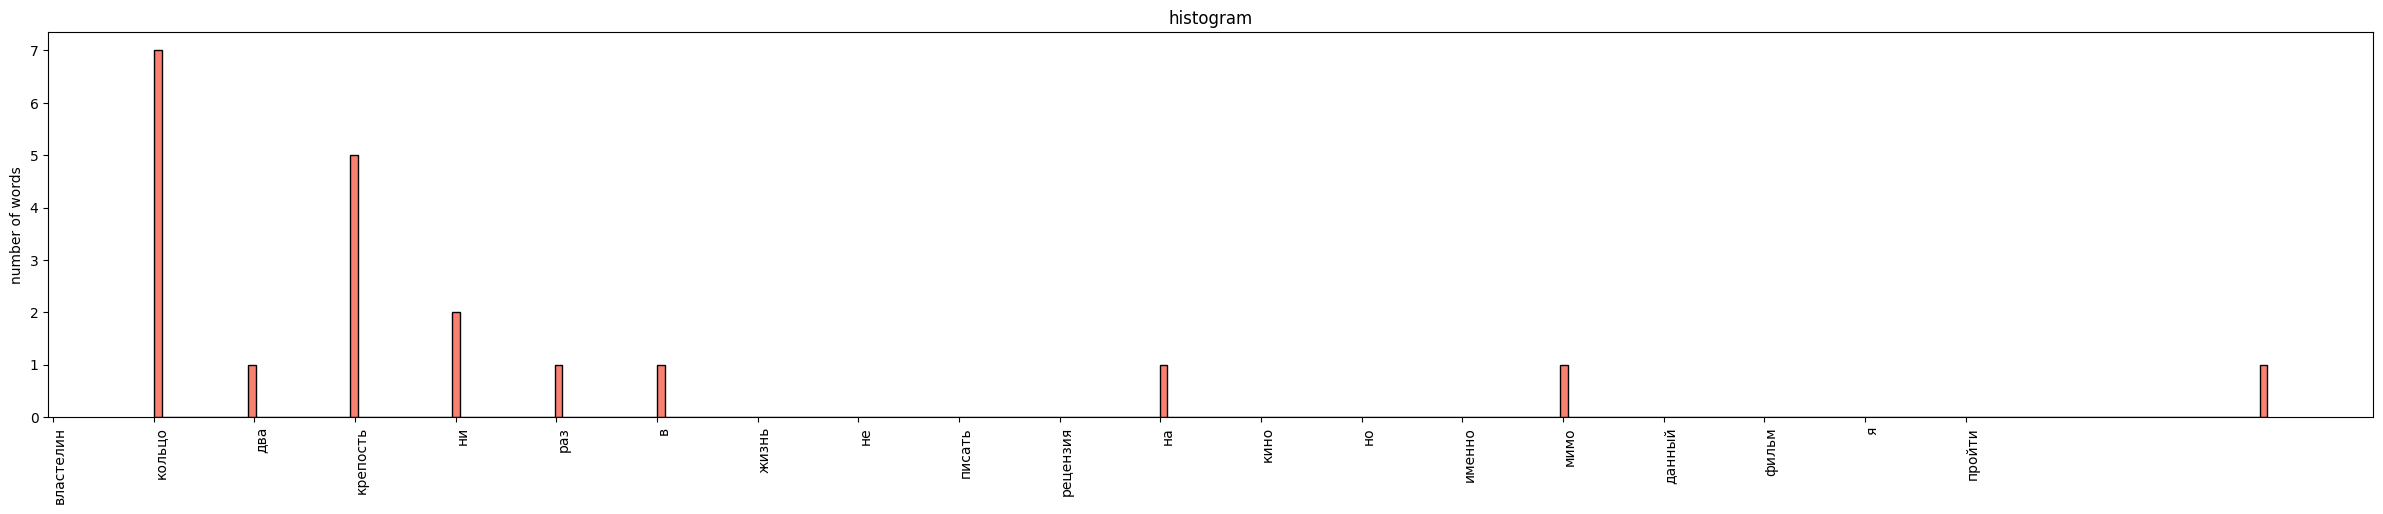

In [ ]:
plt.figure(figsize=(30, 5))
plt.ylabel('number of words')
plt.title('histogram')

new = []
for elem in dict:
    print(elem)
    new.append(elem)
plt.hist(list_t[:20], bins=len(list_t), color='salmon', edgecolor='black')
# plt.bar(list_tmp, new, color='steelblue', width=1)
plt.xticks(np.arange(len(list_t[:20])), new[:20],
           rotation=90, horizontalalignment='left')

plt.show()
